In [1]:
# import modules
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

t=0


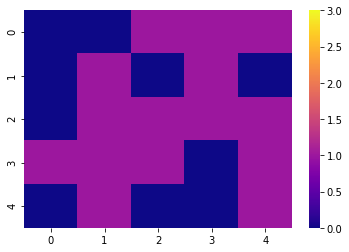

In [36]:
# initialize trees
p = 0.5
N = 5
T = N * N
tree = np.zeros((T, N, N))
for x in range(0, N):
    for y in range(0, N):
        tree[0, x, y] = random.choices([0, 1], [1-p, p])[0]
print("t=0")
sns.heatmap(tree[0, :, :], vmin=0, vmax=3, cmap="plasma")
plt.show()

t=1


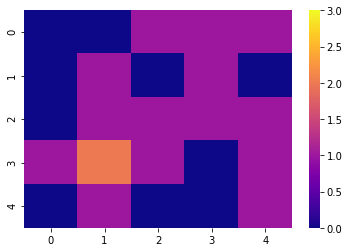

In [37]:
# apply first fire
x1 = random.randint(0, N-1)
y1 = random.randint(0, N-1)
tree[1, :, :] = tree[0, :, :].copy()
tree[1, x1, y1] = 2
print("t=1")
sns.heatmap(tree[1, :, :], vmin=0, vmax=3, cmap="plasma")
plt.show()

t=2


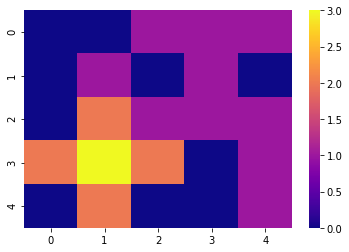

t=3


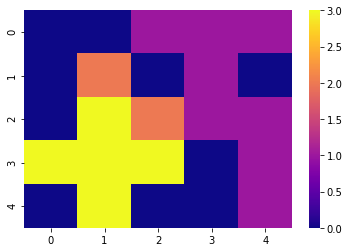

t=4


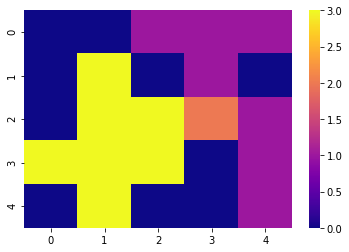

t=5


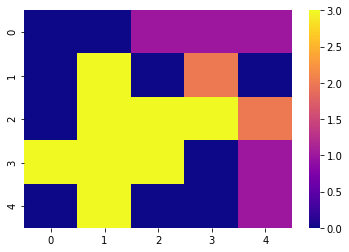

t=6


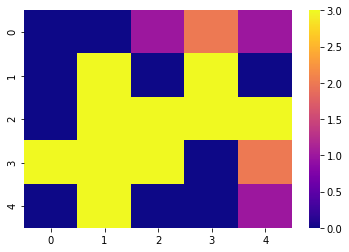

t=7


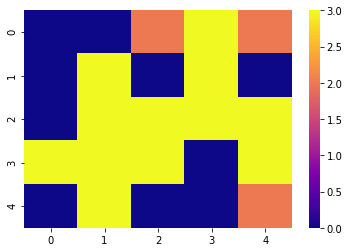

t=8


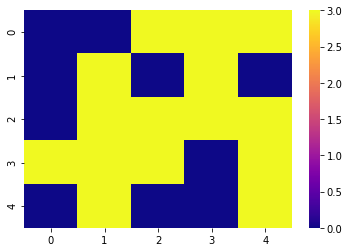

In [38]:
# apply rules with exception at edges
count_2 = [np.count_nonzero(tree[1, :, :] == 2)]
t = 2
while count_2[-1] != 0:
    tree[t, :, :] = tree[t-1, :, :].copy()
    for x in range(0, N):
        for y in range(0, N):
            if tree[t-1, x, y] == 2:
                tree[t, x, y] = 3
            elif tree[t-1, x, y] == 1:
                try:
                    if tree[t-1, x-1, y] == 2:
                        if x-1 >= 0:
                            tree[t, x, y] = 2
                except IndexError:
                    pass
                try:
                    if tree[t-1, x+1, y] == 2:
                        tree[t, x, y] = 2
                except IndexError:
                    pass
                try:
                    if tree[t-1, x, y-1] == 2:
                        if y-1 >= 0:
                            tree[t, x, y] = 2
                except IndexError:
                    pass
                try:
                    if tree[t-1, x, y+1] == 2:
                        tree[t, x, y] = 2
                except IndexError:
                    pass
                
    print("t={}".format(t))
    sns.heatmap(tree[t, :, :], vmin=0, vmax=3, cmap="plasma")
    plt.show()
              
    count_2.append(np.count_nonzero(tree[t, :, :] == 2))
    t += 1

In [41]:
score = np.count_nonzero(tree[t-1, :, :] == 3) / (N * N)
print(score)

0.6
